# Financial Data Analysis

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset from csv file

df = pd.read_csv("../DATA/financial_data.csv")
df.head()

,Date,Revenue,Expenses,Profit
0,31 01 2022,19000,5000,14000
1,28 02 2022,16000,5500,10500
2,31 03 2022,10000,7000,3000
3,30 04 2022,18000,8000,10000
4,31 05 2022,25000,9000,16000


In [3]:
# Insights of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20 non-null     object
 1   Revenue   20 non-null     int64 
 2   Expenses  20 non-null     int64 
 3   Profit    20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 772.0+ bytes


In [4]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     datetime64[ns]
 1   Revenue   20 non-null     int64         
 2   Expenses  20 non-null     int64         
 3   Profit    20 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 772.0 bytes


In [5]:
# Monthly averages of revenue, expenses and profit

avg_revenue = df['Revenue'].mean()
avg_expenses = df['Expenses'].mean()
avg_profit = df['Profit'].mean()

print(f"The average monthly revenue is ${avg_revenue:.2f}")
print(f"The average monthly expenses is ${avg_expenses:.2f}")
print(f"The average monthly profit is ${avg_profit:.2f}")

The average monthly revenue is $35200.00
The average monthly expenses is $15425.00
The average monthly profit is $19775.00


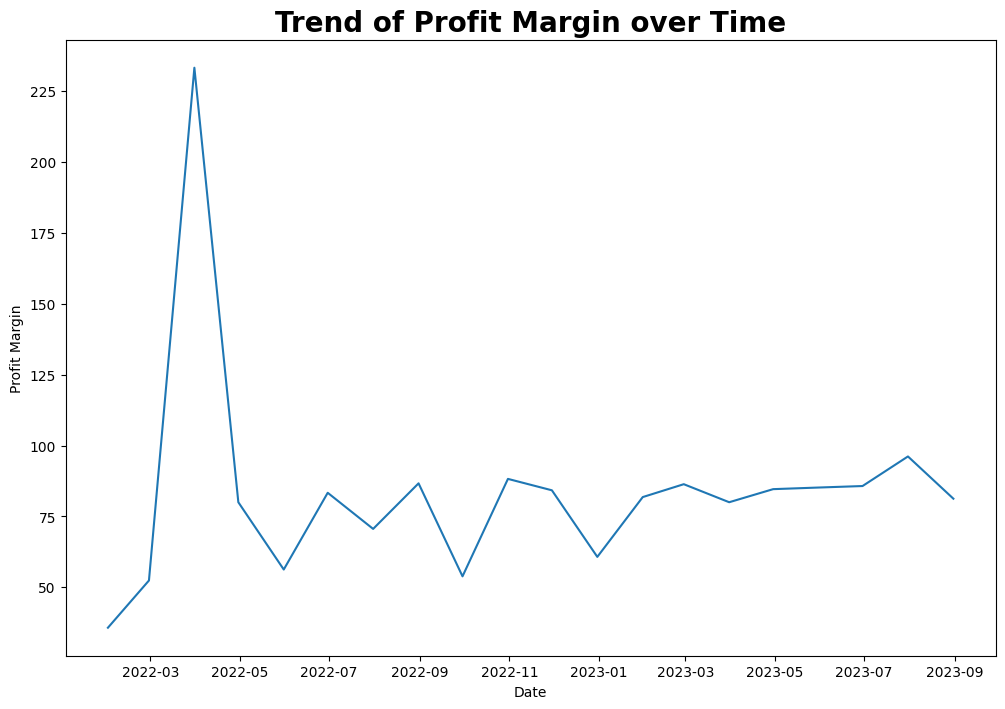

In [6]:
# Compute profit margin
df['Profit Margin'] = (df['Expenses']/df['Profit'])*100

# Plot profit margin over time
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(df['Date'],df['Profit Margin'])
ax.set(xlabel='Date',ylabel='Profit Margin')
plt.title(label="Trend of Profit Margin over Time",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

In [7]:
# Highest and lowest revenue 
highest_revenue = df['Revenue'].max()
lowest_revenue = df['Revenue'].min()

# Compute revenue difference
range_revenue = highest_revenue - lowest_revenue
print(f"The difference between highest and lowest revenue is ${range_revenue:.2f}")

The difference between highest and lowest revenue is $48000.00


In [8]:
# OR

highest_revenue = df.loc[df['Revenue']==df['Revenue'].max(),'Revenue'].values[0]
lowest_revenue = df.loc[df['Revenue']==df['Revenue'].min(),'Revenue'].values[0]

range_revenue = highest_revenue - lowest_revenue
print(f"The difference between highest and lowest revenue is ${range_revenue:.2f}")

The difference between highest and lowest revenue is $48000.00


In [9]:
# Months with highest and lowest revenue
df['Month'] = df['Date'].dt.month_name()

month_highest_revenue = df.loc[df['Revenue']==df['Revenue'].max(),'Month'].values[0]
month_lowest_revenue = df.loc[df['Revenue']==df['Revenue'].min(),'Month'].values[0]

print(f"The month of the highest revenue is {month_highest_revenue}")
print(f"The month of the lowest revenue is {month_lowest_revenue}")

The month of the highest revenue is August
The month of the lowest revenue is March


In [10]:
# Months with expenses above $10,000
month_with_expenses_above_10k = df.loc[df['Expenses']>10000,'Month']
month_with_expenses_above_10k

6          July
7        August
8     September
9       October
10     November
11     December
12      January
13     February
14        March
15        April
16          May
17         June
18         July
19       August
Name: Month, dtype: object

In [11]:
# Group df by quarter
df_quarters = df.groupby(df['Date'].dt.to_period('Q'))['Profit'].sum()
df_quarters

Date
2022Q1    27500
2022Q2    38000
2022Q3    58000
2022Q4    64000
2023Q1    69000
2023Q2    81000
2023Q3    58000
Freq: Q-DEC, Name: Profit, dtype: int64

In [12]:
# Print profit of last quarter of 2022
print(f"The profit of last quarter of 2022 is {df_quarters.loc['2022Q4']}")

The profit of last quarter of 2022 is 64000


In [13]:
# Quarterly revenue change
df_quarters_revenue = df.groupby(df['Date'].dt.to_period('Q'))['Revenue'].sum()
quarterly_rev_change = df_quarters_revenue.pct_change()

print(f"Percentage change in revenue per quarter is")
print(f"{quarterly_rev_change:}")

Percentage change in revenue per quarter is
Date
2022Q1         NaN
2022Q2    0.444444
2022Q3    0.492308
2022Q4    0.154639
2023Q1    0.125000
2023Q2    0.190476
2023Q3   -0.273333
Freq: Q-DEC, Name: Revenue, dtype: float64
